In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
import torch
from torch import nn

# Download training data from open datasets
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 128
# Create data loaders / split data into mini batches
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 101MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 36.6MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 72.6MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.77MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



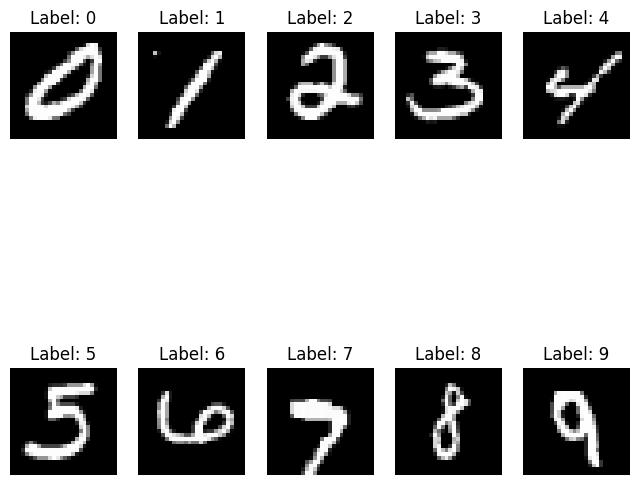

In [ ]:
def get_random_sample_of_digit(training_data, digit):
  #Retreive tensor containing indicies of the give digit in the training data
  indices = (training_data.targets == digit).nonzero().flatten()
  #pick a random index in indicies to choose an image of that digit
  chosen_one = random.choice(indices)
  return training_data[chosen_one]

#initialize plot
figure = plt.figure(figsize = (8, 8))
rows, cols = 2, 5

for digit in range (10):
  img, label = get_random_sample_of_digit(training_data, digit)
  figure.add_subplot(rows, cols, digit+1)
  plt.title(f"Label: {label}")
  plt.imshow(img.squeeze(), cmap="gray")
  plt.axis("off")

plt.show()

In [ ]:
device = (
        "cuda"
        if torch.cuda.is_available()
        else "mps"
        if torch.backends.mps.is_available()
        else "cpu"
)


class NeuralNetowrkDigit(nn.Module):
    def __init__(self, input, h1, h2, output):
      super().__init__()
      # Define flatten function
      self.flatten = nn.Flatten()
      self.linear1 = nn.Linear(input, h1)
      self.linear2 = nn.Linear(h1, h2)
      self.linear3 = nn.Linear(h2, output)
      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
      x = self.flatten(x)
      out1_lin = self.linear1(x)
      out1 = self.relu(out1_lin)
      out2 = self.relu(self.linear2(out1))
      return self.softmax(self.linear3(out2))


In [ ]:
model1 = NeuralNetowrkDigit(28*28,10,10,10)
# Define cross entropy loss function from PyTorch for testing purposes
#loss_fn = nn.CrossEntropyLoss()

#For our manual cross entropy loss function we define the loss function to be the negative log likelehood(NLL)
loss_fn_manual = nn.NLLLoss()

optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)

In [ ]:
def train(train_dataloader, model, loss_fn, optimizer):
    model.train() #set to training mode
    total_loss_in_epoch = 0 #initialize variable to accumulate losses in one epoch of training

    #going through every batch and every sample in the training data
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)

        #Applying Cross Entropy Loss Manually as Instructed
        log_prediction = torch.log(pred)
        loss = loss_fn(log_prediction, y)
        total_loss_in_epoch = total_loss_in_epoch + loss.item()

        #Just backprop, applying optimizer to modify weights, and reseting gradients
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return total_loss_in_epoch/len(train_dataloader)    #returns the average loss in 1 epoch of training


def test(test_dataloader, model, loss_fn):
    num_batches = len(test_dataloader)
    model.eval()
    test_loss = 0

    with torch.no_grad():
        # Iterate over all batches of test data
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)

            #Again making sure to apply cross entropy loss manually
            log_prediction = torch.log(pred)
            test_loss = test_loss + loss_fn(log_prediction, y).item()

    return test_loss/num_batches



In [ ]:
epochs = 100
training_losses = []
testing_losses = []

for t in range(epochs):
    print("Epoch:", t) #For tracking where the code is at
    training_losses.append(train(train_dataloader, model1, loss_fn_manual, optimizer))
    testing_losses.append(test(test_dataloader, model1, loss_fn_manual))

absolute_error = [abs(a - b) for a, b in zip(training_losses, testing_losses)]


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99


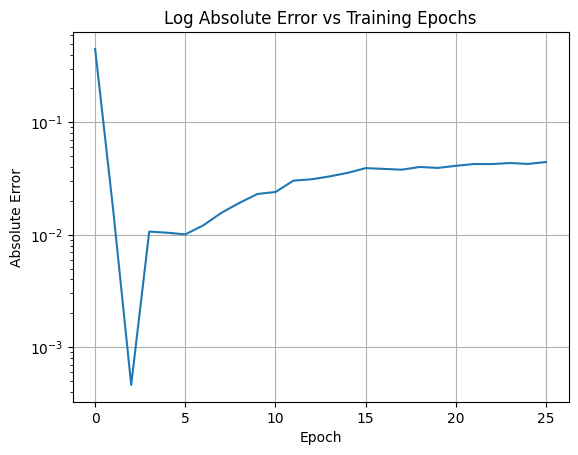

In [ ]:
plt.plot(list(range(epochs)), absolute_error)
plt.title("Log Absolute Error vs Training Epochs")
plt.xlabel("Epoch")
plt.ylabel("Absolute Error")
plt.yscale('log')
plt.grid(True)

plt.show()